# I. Introduction

Let's explore salaries data-set. It is small by intention, but very powerfull to learn how to explore what to use: **linear** vs **polynomial**.

# 1. Import Libraries

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

# 2. Import a Data-Set

In [3]:
se_file_name = "/content/drive/MyDrive/Data analytics course/position_salaries.csv"
se_df = pd.read_csv(se_file_name)
se_df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For exploration purpose - let's re-create Linear Regression and see - how it been trained.

In [4]:
#X
inpdependet_var = se_df.iloc[:, 1:2].values # kolonnu indpendet jatāsia kā 2d masīvu, kolonnu jānoodod kā range

#y
dependent_var = se_df.iloc[:, -1].values # viendimensijas masīvs pēdējai kolonnai

In [5]:
inpdependet_var

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
dependent_var

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

# 3. Split Data-Set into Training and Test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(inpdependet_var, dependent_var, test_size=1/3, random_state=100)

In [42]:
X_test

array([[8],
       [7],
       [2],
       [6]])

# 4.L Training of Machine Learning Model with Linear Regression

In [43]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 5.L Run a prediction

In [44]:
y_pred = lin_reg_model.predict(X_test)
y_pred

array([560978.26086957, 462798.91304348, -28097.82608696, 364619.56521739])

# 6.L Visualize results

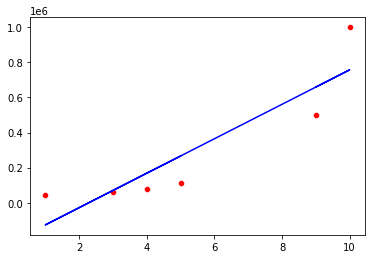

In [45]:
sns.scatterplot(x=X_train[:,0], y=y_train, color="red") #seabornam 2d masīvs jāuztaisa uz 1d masīvu, tāpēc X_train paņem pirmo kolonnu
plt.plot(X_train, lin_reg_model.predict(X_train), color="blue")

Now, let's check how our model approximated test set.

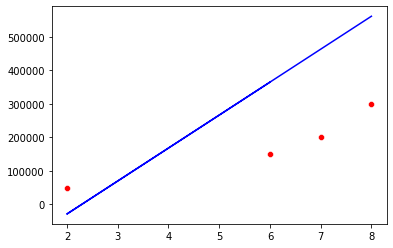

In [46]:
sns.scatterplot(x=X_test[:,0], y=y_test, color="red") #seabornam 2d masīvs jāuztaisa uz 1d masīvu, tāpēc X_train paņem pirmo kolonnu
plt.plot(X_test, lin_reg_model.predict(X_test), color="blue")

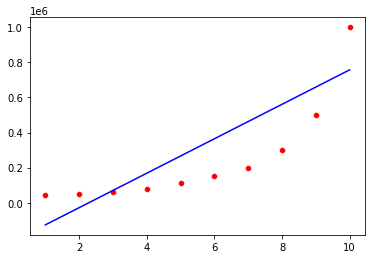

In [47]:
sns.scatterplot(x=inpdependet_var[:,0], y=dependent_var, color="red") #seabornam 2d masīvs jāuztaisa uz 1d masīvu, tāpēc X_train paņem pirmo kolonnu
plt.plot(inpdependet_var, lin_reg_model.predict(inpdependet_var), color="blue")

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

In [49]:
r2_score_lin = r2_score(y_test, y_pred)
r2_score_lin*100 #r2 score procentos

-482.56538325214507

# 4.P Training of Machine Learning Model with Polynomial Linear Regression

There will be two steps:


1.   Create a matrix of non-linear representation of x1 feature (x1, x1^2, etc.)
2.   Import that into Linear Regressor (since the feature is lineary summed)





In [64]:
poly_reg = PolynomialFeatures(9) #sākumā bija 2, tad 4, kas bija ok, bet ar 9 jau ir overfit

Next - we shall create a matrix of *x1* and *x1^2* feature (actually transfor operation is done). Thus we shall use *fit_transfor* method.

In [65]:
X_poly_train = poly_reg.fit_transform(X_train) #apmāca un paŗveido ar fit_transform (fit tikai apmāca)
X_poly_train

array([[1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04, 7.81250000e+04,
        3.90625000e+05, 1.95312500e+06],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02, 2.18700000e+03,
        6.56100000e+03, 1.96830000e+04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03, 1.63840000e+04,
        6.55360000e+04, 2.62144000e+05],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05, 1.00000000e+06, 1.00000000e+07,
        1.00000000e+08, 1.00000000e+09],
       [1.00000000e+00, 9.00000000e+00, 8.10000000e+01, 7.29000000e+02,
   

In [66]:
poly_lin_reg_model = LinearRegression() # tas pats lineārās regresiajs modelis, tikai x ir transformēts
poly_lin_reg_model.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 5.P Run a prediction

In [67]:
y_pred_poly = poly_lin_reg_model.predict(poly_reg.fit_transform(X_test))
y_pred_poly

array([326388.71153564, 225897.8283866 ,  48743.01452189, 155962.76232982])

# 6.P Visualize results

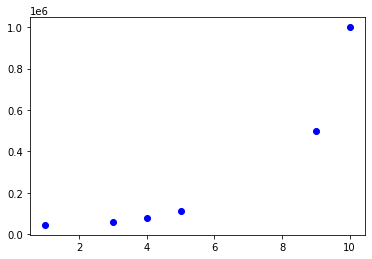

In [68]:
sns.scatterplot(x=X_poly_train[:,1], y=y_train, color="red") #[:, 1] tāpēc, ka paņem vienu kolonnu tikai
# plt.plot(X_poly_train[:, 1], poly_lin_reg_model.predict(X_poly_train), color="blue") šo nevajag, puntiem dažāda vērtības, tāpēc normāla līnu nevar uzzimēt
plt.scatter(X_poly_train[:, 1], poly_lin_reg_model.predict(X_poly_train), color="blue")

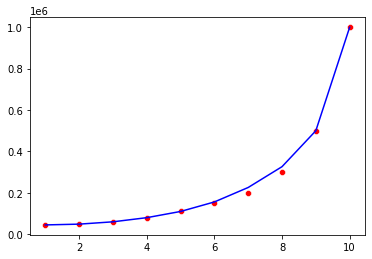

In [69]:
sns.scatterplot(x=inpdependet_var[:,0], y=dependent_var, color="red")
plt.plot(inpdependet_var, poly_lin_reg_model.predict(poly_reg.fit_transform(inpdependet_var)), color="blue") # uztaisa transformāciju

In [70]:
r2_score_poly = r2_score(y_test, y_pred_poly)
r2_score_poly*100 #r2 score procentos

95.67939643462365

# Predict Value

In [71]:
lin_reg_model.predict([[8.5]])

array([610067.93478261])

In [72]:
poly_lin_reg_model.predict(poly_reg.fit_transform([[8.5]])) #jāatceras par fit_transform

array([396781.49816015])